columnas_necesarias = [
    'r9',  # Terminó la carrera sin semestres adicionales
    'r18',  # Número de empleos
    'r26',  # Rango de ingresos
    'r24',  # Horas trabajadas
    'r11',  # Promedio final
    'r3',  # Sexo
    'r5',  # Estado civil
    'r14', # Piensa seguir estudiando
    'r16', # Trabajó y estudió al mismo tiempo
    'r34', # Volvería a elegir su carrera
    'r32', # Volvería a elegir CONALEP
    'r36', # Escolaridad del padre de familia
    'r4'   # Trayectoria con base en edad
]

In [1]:
import pandas as pd
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cargar la base de datos
ruta_csv = 'BaseGeneral.csv'

# Especificar las columnas que necesitamos importar
columnas_necesarias = [
    'r9',  # Terminó la carrera sin semestres adicionales
    'r18',  # Número de empleos
    'r26',  # Rango de ingresos
    'r24',  # Horas trabajadas
    'r11',  # Promedio final
    'r3',  # Sexo
    'r5',  # Estado civil
    'r14', # Piensa seguir estudiando
    'r16', # Trabajó y estudió al mismo tiempo
    'r34', # Volvería a elegir su carrera
    'r32', # Volvería a elegir CONALEP
    'r36', # Escolaridad del padre de familia
    'r4',   # Trayectoria con base en edad
    'r25', # ingreso
]

# Cargar solo las columnas necesarias del archivo CSV
ruta_csv = 'BaseGeneral.csv'
df = pd.read_csv(ruta_csv, usecols=columnas_necesarias)

# Reconstruir las variables afectadas con mayor precisión

# 1. Terminó la carrera sin semestres adicionales (r9)
# 0 = "Sí", 1 = "No"
df['terbien'] = df['r9'].apply(lambda x: 0 if str(x) == "1" else (1 if str(x) == "2" else None))

# 2. Número de empleos - esta es una variable numérica (r18)
# No necesita codificación adicional, ya que es numérica.
df['nuemp'] = pd.to_numeric(df['r18'], errors='coerce')

# 3. Rango de ingresos en el caso de los que trabajaron (r26)
# 0 = "Menos de 1,300", 1 = "1301-2600", 2 = "2601-5200", 3 = "5201-7900", 
# 4 = "7901-10500", 5 = "10500 o más"
df['rangoingre'] = df['r26'].apply(lambda x: 0 if str(x) == "1" else
                                            1 if str(x) == "2" else
                                            2 if str(x) == "3" else
                                            3 if str(x) == "4" else
                                            4 if str(x) == "5" else
                                            5 if str(x) in ["6", "7", "8"] else None)

# 4. Horas trabajadas (numérica r24) y su rango (categórica)
# 0 = "1-7", 1 = "8-14", 2 = "15-21", 3 = "22-28", 4 = "29-35", 
# 5 = "36-42", 6 = "43-49", 7 = "50-57", 8 = "58 o más"
df['horstrab'] = pd.to_numeric(df['r24'], errors='coerce')
df['ranhortra'] = df['horstrab'].apply(lambda x: 0 if 1 <= x <= 7 else
                                                 1 if 8 <= x <= 14 else
                                                 2 if 15 <= x <= 21 else
                                                 3 if 22 <= x <= 28 else
                                                 4 if 29 <= x <= 35 else
                                                 5 if 36 <= x <= 42 else
                                                 6 if 43 <= x <= 49 else
                                                 7 if 50 <= x <= 57 else
                                                 8 if 58 <= x <= 98 else None)

# Variables del Logit

# 5. Promedio final (r11)
# 0 = "Suficiente", 1 = "Bueno", 2 = "Excelente"
df['promfin'] = df['r11'].apply(lambda x: 0 if str(x) == "S" else (1 if str(x) == "B" else (2 if str(x) == "E" else None)))

# 6. Sexo (r3)
# 0 = "Mujer", 1 = "Hombre"
df['sex'] = df['r3'].apply(lambda x: 0 if str(x) == "F" else (1 if str(x) == "M" else None))

# 7. Estado civil (r5)
# 0 = "Soltero", 1 = "Casado o unión libre"
df['estadocivil'] = df['r5'].apply(lambda x: 0 if str(x) == "1" else (1 if str(x) in ["2", "6"] else None))

# 8. Piensa seguir estudiando (r14)
# 0 = "No", 1 = "Sí"
df['seguirestud'] = df['r14'].apply(lambda x: 0 if str(x) == "2" else (1 if str(x) == "1" else None))

# 9. Trabajó y estudió al mismo tiempo (r16)
# 0 = "No", 1 = "Sí"
df['trabyest'] = df['r16'].apply(lambda x: 0 if str(x) == "2" else (1 if str(x) == "1" else None))

# 10. Volvería a elegir su carrera (r34)
# 0 = "No", 1 = "Sí"
df['carrerax2'] = df['r34'].apply(lambda x: 0 if str(x) == "2" else (1 if str(x) == "1" else None))

# 11. Volvería a elegir CONALEP (r32)
# 0 = "No", 1 = "Sí"
df['conax2'] = df['r32'].apply(lambda x: 0 if str(x) == "2" else (1 if str(x) == "1" else None))

# 12. Escolaridad del padre de familia (r36)
# 0 = "Sin estudios", 1 = "Primaria", 2 = "Secundaria", 3 = "Preparatoria", 4 = "Licenciatura o más"
df['escopadre'] = df['r36'].apply(lambda x: 0 if str(x) == "1" else
                                             1 if str(x) == "2" else
                                             2 if str(x) in ["3", "4"] else
                                             3 if str(x) in ["5", "6"] else
                                             4 if str(x) in ["7", "8", "9"] else None)

# 13. Trayectoria con base en edad (r4)
# 0 = "Regular", 1 = "Irregular", 2 = "Muy irregular"
df['edad'] = df['r4'].apply(lambda x: 0 if 16 <= x <= 18 else
                                     1 if 19 <= x <= 22 else
                                     2 if 23 <= x <= 34 else None)

# Recalcular los valores únicos y frecuencias para asegurarme de que todo esté correcto
def unique_values_and_frequencies(series):
    return series.value_counts()

categorical_details_corrected = df[['terbien', 'rangoingre', 'ranhortra', 'promfin', 'sex', 'estadocivil', 
                                    'seguirestud', 'trabyest', 'carrerax2', 'conax2', 'escopadre', 'edad']].apply(unique_values_and_frequencies)



C:\Users\Eduardo Pc\AppData\Local\Temp\ipykernel_17112\861082043.py:29: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_csv, usecols=columnas_necesarias)


In [2]:
# Función para obtener valores únicos y frecuencias
def unique_values_and_frequencies(series):
    return series.value_counts()

# Calcular valores únicos y frecuencias para las variables categóricas
categorical_details_corrected = df[['terbien', 'rangoingre', 'ranhortra', 'promfin', 'sex', 'estadocivil', 
                                    'seguirestud', 'trabyest', 'carrerax2', 'conax2', 'escopadre', 'edad']].apply(unique_values_and_frequencies)

# Mostrar los resultados
print(categorical_details_corrected)

     terbien  rangoingre  ranhortra  promfin      sex  estadocivil  \
0.0  51478.0      2872.0       1509   5836.0  25112.0      52361.0   
1.0   4454.0      4543.0       1312  41815.0  30820.0       3022.0   
2.0      NaN      1932.0       1374   8281.0      NaN          NaN   
3.0      NaN       625.0       1403      NaN      NaN          NaN   
4.0      NaN       215.0       1175      NaN      NaN          NaN   
5.0      NaN       197.0       1286      NaN      NaN          NaN   
6.0      NaN         NaN       1541      NaN      NaN          NaN   
7.0      NaN         NaN        458      NaN      NaN          NaN   
8.0      NaN         NaN        327      NaN      NaN          NaN   

     seguirestud  trabyest  carrerax2   conax2  escopadre     edad  
0.0      19294.0   35849.0    13751.0  15734.0     2975.0  35948.0  
1.0      36638.0   20083.0    41203.0  39706.0    18747.0  17168.0  
2.0          NaN       NaN        NaN      NaN    19639.0   2053.0  
3.0          NaN       

In [3]:
# Asignar etiquetas a las variables y valores a partir de las que ya conocemos antes
labels = {
    'sex': {0: 'Mujer', 1: 'Hombre'},
    'promfin': {0: 'Suficiente', 1: 'Bueno', 2: 'Excelente'},
    'estadocivil': {0: 'Soltero', 1: 'Casado o unión libre'},
    'seguirestud': {0: 'No', 1: 'Sí'},
    'trabyest': {0: 'No', 1: 'Sí'},
    'carrerax2': {0: 'No', 1: 'Sí'},
    'conax2': {0: 'No', 1: 'Sí'},
    'edad': {0: 'Regular', 1: 'Irregular', 2: 'Muy irregular'},
    'escopadre': {0: 'Sin estudios', 1: 'Primaria', 2: 'Secundaria', 3: 'Preparatoria', 4: 'Licenciatura o más'},
    'nuemp': {0: '0 empleos', 1: '1 empleo', 2: '2 empleos', 3: '3 empleos', 4: '4 empleos', 
              5: '5 empleos', 6: '6 empleos', 7: '7 empleos', 8: '8 empleos', 9: '9 empleos'},
    'terbien': {0: 'Sí', 1: 'No'},
    'rangoingre': {0: 'Menos de 1,300', 1: '1301-2600', 2: '2601-5200', 3: '5201-7900', 4: '7901-10500', 5: '10500 o más'},
    'ranhortra': {0: '1-7', 1: '8-14', 2: '15-21', 3: '22-28', 4: '29-35', 5: '36-42', 6: '43-49', 7: '50-57', 8: '58 o más'}
}

# Crear una función para generar las tabulaciones con etiquetas y en formato de porcentaje
def create_labeled_crosstab_percent(df, row_var, col_var, row_labels, col_labels):
    crosstab = pd.crosstab(df[row_var], df[col_var], normalize='columns') * 100
    crosstab.index = crosstab.index.map(row_labels)
    crosstab.columns = crosstab.columns.map(col_labels)
    return crosstab

# Crear y mostrar cada tabulación en formato de porcentaje
promfin_sex_tab_percent = create_labeled_crosstab_percent(
    df, 'promfin', 'sex', labels['promfin'], labels['sex']
)
print("\nDistribución del Promedio Final entre Mujeres y Hombres (%)\n")
print(promfin_sex_tab_percent)

estadocivil_sex_tab_percent = create_labeled_crosstab_percent(
    df, 'estadocivil', 'sex', labels['estadocivil'], labels['sex']
)
print("\nDistribución del Estado Civil entre Mujeres y Hombres (%)\n")
print(estadocivil_sex_tab_percent)

seguirestud_sex_tab_percent = create_labeled_crosstab_percent(
    df, 'seguirestud', 'sex', labels['seguirestud'], labels['sex']
)
print("\nDistribución de la Intención de Seguir Estudiando entre Mujeres y Hombres (%)\n")
print(seguirestud_sex_tab_percent)

trabyest_sex_tab_percent = create_labeled_crosstab_percent(
    df, 'trabyest', 'sex', labels['trabyest'], labels['sex']
)
print("\nDistribución de Quienes Trabajaron y Estudiaron Simultáneamente entre Mujeres y Hombres (%)\n")
print(trabyest_sex_tab_percent)

carrerax2_sex_tab_percent = create_labeled_crosstab_percent(
    df, 'carrerax2', 'sex', labels['carrerax2'], labels['sex']
)
print("\nDistribución de Quienes Volverían a Elegir su Carrera entre Mujeres y Hombres (%)\n")
print(carrerax2_sex_tab_percent)

conax2_sex_tab_percent = create_labeled_crosstab_percent(
    df, 'conax2', 'sex', labels['conax2'], labels['sex']
)
print("\nDistribución de Quienes Volverían a Elegir CONALEP entre Mujeres y Hombres (%)\n")
print(conax2_sex_tab_percent)

edad_sex_tab_percent = create_labeled_crosstab_percent(
    df, 'edad', 'sex', labels['edad'], labels['sex']
)
print("\nDistribución de la Trayectoria Académica por Edad entre Mujeres y Hombres (%)\n")
print(edad_sex_tab_percent)

escopadre_sex_tab_percent = create_labeled_crosstab_percent(
    df, 'escopadre', 'sex', labels['escopadre'], labels['sex']
)
print("\nDistribución de la Escolaridad del Padre entre Mujeres y Hombres (%)\n")
print(escopadre_sex_tab_percent)

nuemp_sex_tab_percent = create_labeled_crosstab_percent(
    df, 'nuemp', 'sex', labels['nuemp'], labels['sex']
)
print("\nDistribución del Número de Empleos entre Mujeres y Hombres (%)\n")
print(nuemp_sex_tab_percent)

terbien_sex_tab_percent = create_labeled_crosstab_percent(
    df, 'terbien', 'sex', labels['terbien'], labels['sex']
)
print("\nDistribución de Quienes Terminaron la Carrera Sin Semestres Adicionales entre Mujeres y Hombres (%)\n")
print(terbien_sex_tab_percent)

rangoingre_sex_tab_percent = create_labeled_crosstab_percent(
    df, 'rangoingre', 'sex', labels['rangoingre'], labels['sex']
)
print("\nDistribución de los Rangos de Ingreso entre Mujeres y Hombres (%)\n")
print(rangoingre_sex_tab_percent)

ranhortra_sex_tab_percent = create_labeled_crosstab_percent(
    df, 'ranhortra', 'sex', labels['ranhortra'], labels['sex']
)
print("\nDistribución de los Rangos de Horas Trabajadas entre Mujeres y Hombres (%)\n")
print(ranhortra_sex_tab_percent)

# Para ver ingreso medio por sexo
df['r25long'] = pd.to_numeric(df['r25'], errors='coerce')

# Ingreso medio por sexo (todos los individuos)
ingreso_sex_mean_percent = df.groupby('sex')['r25long'].mean()
ingreso_sex_mean_percent.index = ingreso_sex_mean_percent.index.map(labels['sex'])
print("\nIngreso Medio por Sexo (Todos los Individuos)\n")
print(ingreso_sex_mean_percent)

# Ingreso medio por sexo (solo los que trabajaron)
trabajaron = df['rangoingre'].notna()
ingreso_sex_mean_trabajaron = df[trabajaron].groupby('sex')['r25long'].mean()
ingreso_sex_mean_trabajaron.index = ingreso_sex_mean_trabajaron.index.map(labels['sex'])
print("\nIngreso Medio por Sexo (Solo los que Trabajaron)\n")
print(ingreso_sex_mean_trabajaron)



Distribución del Promedio Final entre Mujeres y Hombres (%)

sex             Mujer     Hombre
promfin                         
Suficiente   7.243549  13.033744
Bueno       72.511150  76.593121
Excelente   20.245301  10.373134

Distribución del Estado Civil entre Mujeres y Hombres (%)

sex                       Mujer     Hombre
estadocivil                               
Soltero               93.153059  95.672086
Casado o unión libre   6.846941   4.327914

Distribución de la Intención de Seguir Estudiando entre Mujeres y Hombres (%)

sex              Mujer    Hombre
seguirestud                     
No           32.136031  36.41791
Sí           67.863969  63.58209

Distribución de Quienes Trabajaron y Estudiaron Simultáneamente entre Mujeres y Hombres (%)

sex           Mujer    Hombre
trabyest                     
No        72.212488  57.47891
Sí        27.787512  42.52109

Distribución de Quienes Volverían a Elegir su Carrera entre Mujeres y Hombres (%)

sex            Mujer     Hombre

Analizar multicolinealidad

In [4]:
# Eliminar las columnas originales, 
df = df.drop(columns=['r9', 'r18', 'r26', 'r24', 'r11', 'r3', 'r5', 'r14', 'r16', 'r34', 'r32', 'r36', 'r4','r25'])

# Calcular el VIF para detectar multicolinealidad
X = df.dropna()  # Eliminar filas con NaN antes de calcular VIF

variables_usadas_en_modelo = [
    'terbien', 'nuemp', 'rangoingre', 'promfin', 'sex', 
    'estadocivil', 'seguirestud', 'trabyest', 'carrerax2', 
    'conax2', 'escopadre', 'edad'
]

X = df[variables_usadas_en_modelo].dropna()  # Eliminar filas con NaN antes de calcular VIF
X['intercept'] = 1  # Añadir una constante (intercept) para el cálculo de VIF

vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los resultados del VIF
print(vif_data)



       Variable        VIF
0       terbien   1.074121
1         nuemp   1.148770
2    rangoingre   1.072250
3       promfin   1.076897
4           sex   1.057701
5   estadocivil   1.100477
6   seguirestud   1.043461
7      trabyest   1.144370
8     carrerax2   1.122105
9        conax2   1.134456
10    escopadre   1.044796
11         edad   1.138204
12    intercept  33.862223


No hay mucha colinealidad entre las variables que se usarán en el modelo, practicamente nula. 

Modelo

In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
import numpy as np

# Asegurarse de que no haya valores NaN en las variables numéricas antes de ajustar el modelo
df = df.dropna(subset=['promfin', 'sex', 'estadocivil', 'seguirestud', 'trabyest', 'carrerax2', 'conax2', 'edad', 'escopadre'])

# Asegurarse de que todas las variables categóricas estén en el formato adecuado (categoría o numérico)
df['promfin'] = df['promfin'].astype('category')
df['sex'] = df['sex'].astype('category')
df['estadocivil'] = df['estadocivil'].astype('category')
df['seguirestud'] = df['seguirestud'].astype('category')
df['trabyest'] = df['trabyest'].astype('category')
df['carrerax2'] = df['carrerax2'].astype('category')
df['conax2'] = df['conax2'].astype('category')
df['edad'] = df['edad'].astype('category')
df['escopadre'] = df['escopadre'].astype('category')

# Definir variables independientes y dependiente
X = df[['sex', 'estadocivil', 'seguirestud', 'trabyest', 'carrerax2', 'conax2', 'edad', 'escopadre']]
X = pd.get_dummies(X, drop_first=True)  # Convertir variables categóricas en dummies
y = df['promfin'].cat.codes  # Convertir la variable de respuesta en numérico

# Ajustar el modelo logit ordinal
model = OrderedModel(y, X, distr='logit')
result = model.fit(method='bfgs', maxiter=2000)

# Mostrar los resultados del modelo
print(result.summary())

# Calcular los Odds Ratios
odds_ratios = np.exp(result.params)

# Mostrar los Odds Ratios
print("\nOdds Ratios de los Coeficientes:\n")
print(odds_ratios)


Optimization terminated successfully.
         Current function value: 0.706608
         Iterations: 72
         Function evaluations: 74
         Gradient evaluations: 74
                             OrderedModel Results                             
Dep. Variable:                      y   Log-Likelihood:                -36783.
Model:                   OrderedModel   AIC:                         7.359e+04
Method:            Maximum Likelihood   BIC:                         7.372e+04
Date:                Wed, 14 Aug 2024                                         
Time:                        23:17:01                                         
No. Observations:               52056                                         
Df Residuals:                   52042                                         
Df Model:                          12                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

### **Coeficientes y Odds Ratios**
Los coeficientes (`coef`) indican la dirección y la magnitud del efecto de cada variable en la probabilidad de estar en una categoría más alta de rendimiento académico. Los odds ratios (`OR`), calculados como `exp(coef)`, expresan el cambio en las probabilidades de estar en una categoría más alta por cada unidad de cambio en la variable independiente.

#### **Interpretación de Variables Clave**

1. **`sex_1` (coef: -0.6707, OR: 0.511364)**
   - **Interpretación**: Ser hombre reduce significativamente la probabilidad de estar en una categoría más alta de rendimiento académico en comparación con ser mujer. Los hombres tienen aproximadamente la mitad de probabilidades de estar en una categoría superior en comparación con las mujeres.
   - **Significancia**: Este efecto es altamente significativo (P<0.001).

2. **`estadocivil_1.0` (coef: 0.0472, OR: 1.048316)**
   - **Interpretación**: Estar casado o en unión libre tiene un efecto positivo muy leve sobre la probabilidad de estar en una categoría más alta de rendimiento académico. El odds ratio sugiere un incremento del 4.8% en las probabilidades, aunque este efecto no es estadísticamente significativo.
   - **Significancia**: Este efecto no es estadísticamente significativo (P=0.278).

3. **`seguirestud_1` (coef: 0.4952, OR: 1.640798)**
   - **Interpretación**: Aquellos que piensan seguir estudiando tienen un 64.1% más de probabilidades de estar en una categoría más alta de rendimiento académico. Esto indica un efecto fuerte y positivo.
   - **Significancia**: Este efecto es altamente significativo (P<0.001).

4. **`trabyest_1` (coef: 0.0061, OR: 1.006104)**
   - **Interpretación**: Trabajar y estudiar al mismo tiempo tiene un efecto insignificante sobre la probabilidad de estar en una categoría más alta de rendimiento académico. El odds ratio cercano a 1 indica que este efecto es prácticamente nulo.
   - **Significancia**: Este efecto no es estadísticamente significativo (P=0.769).

5. **`carrerax2_1.0` (coef: 0.1224, OR: 1.130184)**
   - **Interpretación**: Aquellos que volverían a elegir su carrera tienen un 13.0% más de probabilidades de estar en una categoría más alta de rendimiento académico. Este es un efecto positivo moderado.
   - **Significancia**: Este efecto es estadísticamente significativo (P<0.001).

6. **`conax2_1.0` (coef: 0.3439, OR: 1.410488)**
   - **Interpretación**: Aquellos que volverían a elegir CONALEP tienen un 41.0% más de probabilidades de estar en una categoría más alta de rendimiento académico. Este es un efecto positivo fuerte y significativo.
   - **Significancia**: Este efecto es altamente significativo (P<0.001).

7. **`edad_1.0` (coef: -0.3622, OR: 0.696171)**
   - **Interpretación**: Los estudiantes de 19-22 años tienen aproximadamente un 30.4% menos de probabilidades de estar en una categoría más alta de rendimiento académico en comparación con los de 16-18 años. Esto sugiere que la edad más avanzada dentro de este rango está asociada con un menor rendimiento académico.
   - **Significancia**: Este efecto es altamente significativo (P<0.001).

8. **`edad_2.0` (coef: 0.7168, OR: 2.047802)**
   - **Interpretación**: Los estudiantes de 23-34 años tienen el doble de probabilidades de estar en una categoría más alta de rendimiento académico en comparación con los de 16-18 años. Esto indica un fuerte efecto positivo de la madurez y experiencia en el rendimiento académico.
   - **Significancia**: Este efecto es altamente significativo (P<0.001).

#### **Interpretación de la Escolaridad del Padre (`escopadre`)**

9. **`escopadre_1.0` (coef: 0.0748, OR: 1.077686)**
   - **Interpretación**: Los estudiantes cuyos padres tienen educación primaria tienen un 7.8% más de probabilidades de estar en una categoría más alta de rendimiento académico en comparación con aquellos cuyos padres tienen licenciatura o más. Este efecto es pequeño y sugiere una leve tendencia positiva.
   - **Significancia**: Este efecto es marginalmente significativo (P=0.055).

10. **`escopadre_2.0` (coef: -0.2099, OR: 0.810691)**
    - **Interpretación**: Los estudiantes cuyos padres tienen educación secundaria tienen un 18.9% menos de probabilidades de estar en una categoría más alta de rendimiento académico en comparación con aquellos cuyos padres tienen licenciatura o más. Esto sugiere que una menor escolaridad de los padres está asociada con un menor rendimiento académico.
    - **Significancia**: Este efecto es estadísticamente significativo (P<0.001).

11. **`escopadre_3.0` (coef: -0.2186, OR: 0.803659)**
    - **Interpretación**: Los estudiantes cuyos padres tienen educación preparatoria tienen un 19.6% menos de probabilidades de estar en una categoría más alta de rendimiento académico en comparación con aquellos cuyos padres tienen licenciatura o más. Este resultado también indica una asociación negativa.
    - **Significancia**: Este efecto es estadísticamente significativo (P<0.001).

12. **`escopadre_4.0` (coef: -0.0756, OR: 0.927147)**
    - **Interpretación**: Los estudiantes cuyos padres no tienen estudios formales tienen un 7.3% menos de probabilidades de estar en una categoría más alta de rendimiento académico en comparación con aquellos cuyos padres tienen licenciatura o más. Este efecto es pequeño y no significativo.
    - **Significancia**: Este efecto no es estadísticamente significativo (P=0.132).

### **Umbrales (Thresholds)**

13. **`0/1` (coef: -2.1440, OR: 0.117190)**
    - **Interpretación**: Este umbral indica la probabilidad de pasar de la categoría más baja (0) a la siguiente (1). Un odds ratio de 0.117 sugiere que es relativamente difícil pasar de la categoría más baja a la media.

14. **`1/2` (coef: 1.4134, OR: 4.109736)**
    - **Interpretación**: Este umbral indica la probabilidad de pasar de la categoría media (1) a la más alta (2). Un odds ratio de 4.110 sugiere que es significativamente más fácil moverse de la categoría media a la superior.


interacciones

In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
import numpy as np

# Asegurarse de que no haya valores NaN en las variables numéricas antes de ajustar el modelo
df = df.dropna(subset=['promfin', 'sex', 'estadocivil', 'seguirestud', 'trabyest', 'carrerax2', 'conax2', 'edad', 'escopadre'])

# Asegurarse de que todas las variables categóricas estén en el formato adecuado (categoría o numérico)
df['promfin'] = df['promfin'].astype('category')
df['sex'] = df['sex'].astype('category')
df['estadocivil'] = df['estadocivil'].astype('category')
df['seguirestud'] = df['seguirestud'].astype('category')
df['trabyest'] = df['trabyest'].astype('category')
df['carrerax2'] = df['carrerax2'].astype('category')
df['conax2'] = df['conax2'].astype('category')
df['edad'] = df['edad'].astype('category')
df['escopadre'] = df['escopadre'].astype('category')

# Convertir las columnas categóricas a códigos numéricos para evitar problemas de dtype
df['sex'] = df['sex'].cat.codes
df['estadocivil'] = df['estadocivil'].cat.codes
df['seguirestud'] = df['seguirestud'].cat.codes
df['trabyest'] = df['trabyest'].cat.codes
df['carrerax2'] = df['carrerax2'].cat.codes
df['conax2'] = df['conax2'].cat.codes
df['edad'] = df['edad'].cat.codes
df['escopadre'] = df['escopadre'].cat.codes

# Crear interacciones entre 'sex' y otras variables clave
df['sex_estadocivil'] = df['sex'] * df['estadocivil']
df['sex_seguirestud'] = df['sex'] * df['seguirestud']
df['sex_trabyest'] = df['sex'] * df['trabyest']
df['sex_carrerax2'] = df['sex'] * df['carrerax2']
df['sex_conax2'] = df['sex'] * df['conax2']
df['sex_edad'] = df['sex'] * df['edad']
df['sex_escopadre'] = df['sex'] * df['escopadre']

# Incluir las interacciones en el conjunto de variables independientes
X_interacciones = df[['sex', 'estadocivil', 'seguirestud', 'trabyest', 'carrerax2', 'conax2', 'edad', 'escopadre',
                      'sex_estadocivil', 'sex_seguirestud', 'sex_trabyest', 'sex_carrerax2', 
                      'sex_conax2', 'sex_edad', 'sex_escopadre']]

# Ajustar el modelo logit ordinal con interacciones
model_interacciones = OrderedModel(y, X_interacciones, distr='logit')
result_interacciones = model_interacciones.fit(method='bfgs', maxiter=2000)

# Mostrar los resultados del modelo con interacciones
print(result_interacciones.summary())

# Calcular los Odds Ratios para el modelo con interacciones
odds_ratios_interacciones = np.exp(result_interacciones.params)

# Mostrar los Odds Ratios para el modelo con interacciones
print("\nOdds Ratios de los Coeficientes con Interacciones:\n")
print(odds_ratios_interacciones)


Optimization terminated successfully.
         Current function value: 0.712467
         Iterations: 73
         Function evaluations: 74
         Gradient evaluations: 74
                             OrderedModel Results                             
Dep. Variable:                      y   Log-Likelihood:                -37088.
Model:                   OrderedModel   AIC:                         7.421e+04
Method:            Maximum Likelihood   BIC:                         7.436e+04
Date:                Wed, 14 Aug 2024                                         
Time:                        23:17:28                                         
No. Observations:               52056                                         
Df Residuals:                   52039                                         
Df Model:                          15                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

### 1. **¿Por qué cambian los coeficientes al incluir interacciones?**

Cuando se incluyen interacciones en un modelo, se está permitiendo que el efecto de una variable sobre la variable dependiente dependa del valor de otra variable. Esto tiene varias implicaciones:

- **Cambio en los Efectos Principales**: Al agregar interacciones, los efectos principales de las variables (es decir, los coeficientes que representan los efectos directos sin interacciones) pueden cambiar porque ahora el modelo está considerando cómo esas variables interactúan con otra(s) variable(s). La inclusión de una interacción puede redistribuir la varianza explicada entre las variables principales y las interacciones, lo que afecta los coeficientes.
  
- **Interacción como Modificador de Efecto**: Las variables de interacción actúan como modificadores del efecto principal. Por ejemplo, si `sex_trabyest` tiene un coeficiente negativo, esto indica que el efecto de `trabyest` (trabajar y estudiar) sobre el rendimiento académico es diferente según el sexo.

- **Cambios en la Interpretación**: Los coeficientes de los efectos principales ahora deben interpretarse como el efecto de esa variable cuando la otra variable involucrada en la interacción está en su nivel de referencia (por ejemplo, si `sex=0`).

- **Valores de Referencia:** En este contexto, los valores de referencia son los niveles de las variables categóricas con los cuales se comparan los otros niveles. Por ejemplo, para la variable `sex`, el valor de referencia es "Mujer" (`sex=0`), y para `estadocivil`, es "Soltero" (`estadocivil=0`).

#### **Coeficientes Principales y Odds Ratios:**

1. **`sex` (coef: -0.5028, OR: 0.604834)**
   - **Interpretación:** Ser hombre reduce la probabilidad de subir de categoría de rendimiento académico en un 39.5% en comparación con ser mujer, asumiendo que todas las demás variables están en sus valores de referencia (por ejemplo, `estadocivil=0`).
   - **Significancia:** Este efecto es altamente significativo (P<0.001).

2. **`estadocivil` (coef: 0.0371, OR: 1.037794)**
   - **Interpretación:** Estar casado o en unión libre incrementa la probabilidad de subir de categoría de rendimiento académico en un 3.8% en comparación con estar soltero, pero este efecto no es significativo.
   - **Significancia:** P=0.542 (no significativo).

3. **`seguirestud` (coef: 0.4690, OR: 1.598427)**
   - **Interpretación:** Pensar en seguir estudiando aumenta la probabilidad de subir de categoría de rendimiento académico en un 59.8% en comparación con aquellos que no planean seguir estudiando.
   - **Significancia:** Este efecto es altamente significativo (P<0.001).

4. **`trabyest` (coef: 0.1115, OR: 1.117955)**
   - **Interpretación:** Trabajar y estudiar al mismo tiempo aumenta la probabilidad de subir de categoría de rendimiento académico en un 11.8%.
   - **Significancia:** Este efecto es moderado pero significativo (P=0.001).

5. **`carrerax2` (coef: 0.1809, OR: 1.198299)**
   - **Interpretación:** Volver a elegir la carrera incrementa la probabilidad de subir de categoría de rendimiento académico en un 19.8%.
   - **Significancia:** Este efecto es significativo (P<0.001).

6. **`conax2` (coef: 0.3811, OR: 1.463871)**
   - **Interpretación:** Volver a elegir CONALEP incrementa la probabilidad de subir de categoría de rendimiento académico en un 46.4%.
   - **Significancia:** Este efecto es fuerte y altamente significativo (P<0.001).

7. **`edad` (coef: -0.0730, OR: 0.929590)**
   - **Interpretación:** A medida que la edad aumenta, hay una disminución del 7.0% en la probabilidad de subir de categoría de rendimiento académico.
   - **Significancia:** Este efecto es moderado y significativo (P=0.009).

8. **`escopadre` (coef: -0.0904, OR: 0.913584)**
   - **Interpretación:** Una menor escolaridad del padre reduce la probabilidad de subir de categoría de rendimiento académico en un 8.6%.
   - **Significancia:** Este efecto es significativo (P<0.001).

#### **Interacciones:**

9. **`sex_estadocivil` (coef: 0.0813, OR: 1.084712)**
   - **Interpretación:** El efecto de estar casado o en unión libre sobre la probabilidad de subir de categoría de rendimiento académico es ligeramente mayor para los hombres, aumentando la probabilidad en un 8.5%. Sin embargo, este efecto no es significativo.
   - **Significancia:** P=0.384 (no significativo).

10. **`sex_seguirestud` (coef: 0.0555, OR: 1.057088)**
    - **Interpretación:** La intención de seguir estudiando tiene un efecto ligeramente mayor en los hombres, aumentando la probabilidad de subir de categoría en un 5.7%, pero este efecto no es significativo.
    - **Significancia:** P=0.202 (no significativo).

11. **`sex_trabyest` (coef: -0.1769, OR: 0.837830)**
    - **Interpretación:** El efecto de trabajar y estudiar al mismo tiempo es menor para los hombres, reduciendo la probabilidad de subir de categoría de rendimiento académico en un 16.2%.
    - **Significancia:** Este efecto es significativo (P<0.001).

12. **`sex_carrerax2` (coef: -0.0943, OR: 0.909989)**
    - **Interpretación:** El efecto de volver a elegir la carrera es ligeramente menor para los hombres, disminuyendo la probabilidad de subir de categoría en un 9.0%. Este efecto es marginalmente significativo.
    - **Significancia:** P=0.060 (marginalmente significativo).

13. **`sex_conax2` (coef: -0.0810, OR: 0.922223)**
    - **Interpretación:** El efecto de volver a elegir CONALEP es menor para los hombres, reduciendo la probabilidad de subir de categoría en un 7.8%. Este efecto es marginalmente significativo.
    - **Significancia:** P=0.098 (marginalmente significativo).

14. **`sex_edad` (coef: -0.0036, OR: 0.996394)**
    - **Interpretación:** La edad no modifica significativamente el impacto del sexo en la probabilidad de subir de categoría de rendimiento académico.
    - **Significancia:** P=0.923 (no significativo).

15. **`sex_escopadre` (coef: -0.0267, OR: 0.973667)**
    - **Interpretación:** El nivel de educación del padre afecta de manera similar a hombres y mujeres, con una ligera reducción en la probabilidad de subir de categoría de rendimiento académico para los hombres, pero este efecto no es significativo.
    - **Significancia:** P=0.191 (no significativo).

#### **Umbrales (Thresholds):**

16. **`0/1` (coef: -2.1021, OR: 0.122199)**
    - **Interpretación:** Este umbral indica la dificultad de subir de la categoría más baja de rendimiento académico (por ejemplo, "Suficiente") a la siguiente ("Bueno"). Un odds ratio de 0.122 sugiere que es relativamente difícil pasar de la categoría más baja a la media.

17. **`1/2` (coef: 1.4072, OR: 4.084567)**
    - **Interpretación:** Este umbral indica la facilidad de pasar de la categoría media de rendimiento académico (por ejemplo, "Bueno") a la más alta ("Excelente"). Un odds ratio de 4.085 sugiere que es significativamente más fácil moverse de la categoría media a la superior.

desagregar edad y escolaridad del padre ya no permite un calculo de modelo. 
c:\Users\Eduardo Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '

validacion cruzada

In [6]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Asegurarse de que no haya valores NaN en las variables numéricas antes de ajustar el modelo
df = df.dropna(subset=['promfin', 'sex', 'estadocivil', 'seguirestud', 'trabyest', 'carrerax2', 'conax2', 'edad', 'escopadre'])

# Asegurarse de que todas las variables categóricas estén en el formato adecuado (categoría o numérico)
df['promfin'] = df['promfin'].astype('category')
df['sex'] = df['sex'].astype('category')
df['estadocivil'] = df['estadocivil'].astype('category')
df['seguirestud'] = df['seguirestud'].astype('category')
df['trabyest'] = df['trabyest'].astype('category')
df['carrerax2'] = df['carrerax2'].astype('category')
df['conax2'] = df['conax2'].astype('category')
df['edad'] = df['edad'].astype('category')
df['escopadre'] = df['escopadre'].astype('category')

# Convertir las columnas categóricas a códigos numéricos para evitar problemas de dtype
df['sex'] = df['sex'].cat.codes
df['estadocivil'] = df['estadocivil'].cat.codes
df['seguirestud'] = df['seguirestud'].cat.codes
df['trabyest'] = df['trabyest'].cat.codes
df['carrerax2'] = df['carrerax2'].cat.codes
df['conax2'] = df['conax2'].cat.codes
df['edad'] = df['edad'].cat.codes
df['escopadre'] = df['escopadre'].cat.codes

# Crear interacciones entre 'sex' y otras variables clave
df['sex_estadocivil'] = df['sex'] * df['estadocivil']
df['sex_seguirestud'] = df['sex'] * df['seguirestud']
df['sex_trabyest'] = df['sex'] * df['trabyest']
df['sex_carrerax2'] = df['sex'] * df['carrerax2']
df['sex_conax2'] = df['sex'] * df['conax2']
df['sex_edad'] = df['sex'] * df['edad']
df['sex_escopadre'] = df['sex'] * df['escopadre']

# Variables independientes y dependiente
X = df[['sex', 'estadocivil', 'seguirestud', 'trabyest', 'carrerax2', 'conax2', 'edad', 'escopadre',
        'sex_estadocivil', 'sex_seguirestud', 'sex_trabyest', 'sex_carrerax2', 
        'sex_conax2', 'sex_edad', 'sex_escopadre']]

y = df['promfin'].cat.codes

# Resetear los índices para que coincidan con los generados por KFold
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Ajustar el modelo logit ordinal
    model_cv = OrderedModel(y_train, X_train, distr='logit')
    result_cv = model_cv.fit(method='bfgs', maxiter=2000, disp=False)
    
    # Predicción en el conjunto de prueba
    y_pred = result_cv.predict(X_test)
    
    # Convertir las probabilidades predichas a categorías
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Calcular la precisión
    accuracy = accuracy_score(y_test, y_pred_classes)
    accuracies.append(accuracy)

# Promedio de las precisiones de todos los folds
mean_accuracy = np.mean(accuracies)
print(f"Precisión promedio de validación cruzada: {mean_accuracy:.4f}")


Precisión promedio de validación cruzada: 0.7484


Una precisión promedio de validación cruzada de 0.7484 indica que el modelo tiene un desempeño razonablemente bueno en la predicción de la categoría de rendimiento académico. Esto significa que, en promedio, el modelo predice correctamente el rendimiento académico en aproximadamente el 74.84% de los casos en los diferentes subconjuntos de datos utilizados en la validación cruzada.

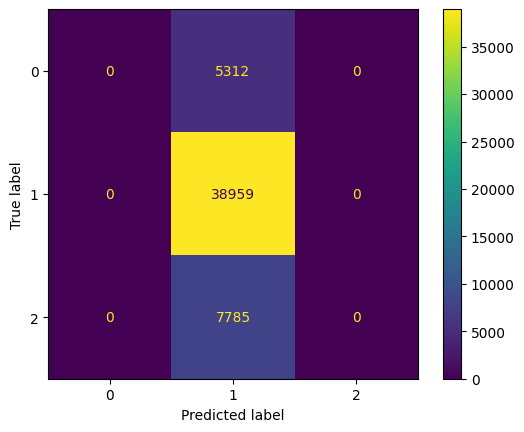

In [7]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Asegurarse de que no haya valores NaN en las variables numéricas antes de ajustar el modelo
df = df.dropna(subset=['promfin', 'sex', 'estadocivil', 'seguirestud', 'trabyest', 'carrerax2', 'conax2', 'edad', 'escopadre'])

# Asegurarse de que todas las variables categóricas estén en el formato adecuado (categoría o numérico)
df['promfin'] = df['promfin'].astype('category')
df['sex'] = df['sex'].astype('category')
df['estadocivil'] = df['estadocivil'].astype('category')
df['seguirestud'] = df['seguirestud'].astype('category')
df['trabyest'] = df['trabyest'].astype('category')
df['carrerax2'] = df['carrerax2'].astype('category')
df['conax2'] = df['conax2'].astype('category')
df['edad'] = df['edad'].astype('category')
df['escopadre'] = df['escopadre'].astype('category')

# Convertir las columnas categóricas a códigos numéricos para evitar problemas de dtype
df['sex'] = df['sex'].cat.codes
df['estadocivil'] = df['estadocivil'].cat.codes
df['seguirestud'] = df['seguirestud'].cat.codes
df['trabyest'] = df['trabyest'].cat.codes
df['carrerax2'] = df['carrerax2'].cat.codes
df['conax2'] = df['conax2'].cat.codes
df['edad'] = df['edad'].cat.codes
df['escopadre'] = df['escopadre'].cat.codes

# Crear interacciones entre 'sex' y otras variables clave
df['sex_estadocivil'] = df['sex'] * df['estadocivil']
df['sex_seguirestud'] = df['sex'] * df['seguirestud']
df['sex_trabyest'] = df['sex'] * df['trabyest']
df['sex_carrerax2'] = df['sex'] * df['carrerax2']
df['sex_conax2'] = df['sex'] * df['conax2']
df['sex_edad'] = df['sex'] * df['edad']
df['sex_escopadre'] = df['sex'] * df['escopadre']

# Variables independientes y dependiente
X = df[['sex', 'estadocivil', 'seguirestud', 'trabyest', 'carrerax2', 'conax2', 'edad', 'escopadre',
        'sex_estadocivil', 'sex_seguirestud', 'sex_trabyest', 'sex_carrerax2', 
        'sex_conax2', 'sex_edad', 'sex_escopadre']]

y = df['promfin'].cat.codes

# Resetear los índices para que coincidan con los generados por KFold
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

y_true_all = []
y_pred_all = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Ajustar el modelo logit ordinal
    model_cv = OrderedModel(y_train, X_train, distr='logit')
    result_cv = model_cv.fit(method='bfgs', maxiter=2000, disp=False)
    
    # Predicción en el conjunto de prueba
    y_pred = result_cv.predict(X_test)
    
    # Convertir las probabilidades predichas a categorías
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Acumular las predicciones y los valores reales
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred_classes)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_all, y_pred_all)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()


la precision del modelo no es buena, aunque la metrica anterior indique que lo es, el valor está "inflado" debido a que la mayoria de los datos y las predicciones son 1.

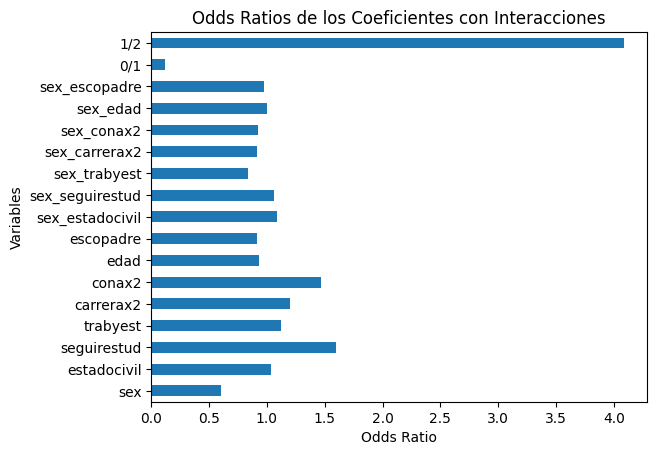

In [8]:
import matplotlib.pyplot as plt

# Gráfico de barras de los odds ratios
odds_ratios_interacciones.plot(kind='barh')
plt.title('Odds Ratios de los Coeficientes con Interacciones')
plt.xlabel('Odds Ratio')
plt.ylabel('Variables')
plt.show()


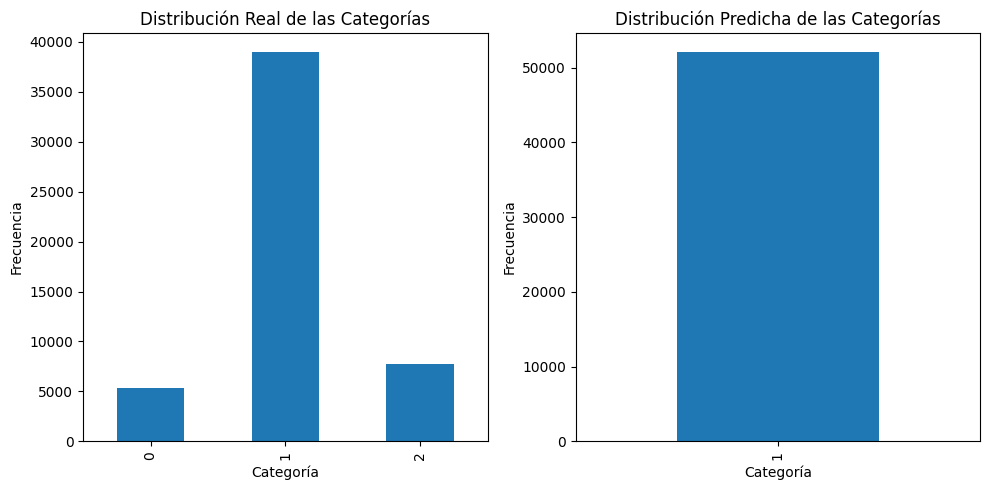

In [9]:
y_test_series = pd.Series(y_true_all)
y_pred_series = pd.Series(y_pred_all)

# Gráfico de barras de la distribución real
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
y_test_series.value_counts().sort_index().plot(kind='bar')
plt.title('Distribución Real de las Categorías')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

# Gráfico de barras de la distribución predicha
plt.subplot(1, 2, 2)
y_pred_series.value_counts().sort_index().plot(kind='bar')
plt.title('Distribución Predicha de las Categorías')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Probamos con undersampling

C:\Users\Eduardo Pc\AppData\Local\Temp\ipykernel_10784\2150325149.py:12: DtypeWarning: Columns (18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_csv)


Optimization terminated successfully.
         Current function value: 1.042782
         Iterations: 40
         Function evaluations: 41
         Gradient evaluations: 41
                             OrderedModel Results                             
Dep. Variable:                      y   Log-Likelihood:                -3350.5
Model:                   OrderedModel   AIC:                             6721.
Method:            Maximum Likelihood   BIC:                             6782.
Date:                Wed, 14 Aug 2024                                         
Time:                        23:46:35                                         
No. Observations:                3213                                         
Df Residuals:                    3203                                         
Df Model:                           8                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

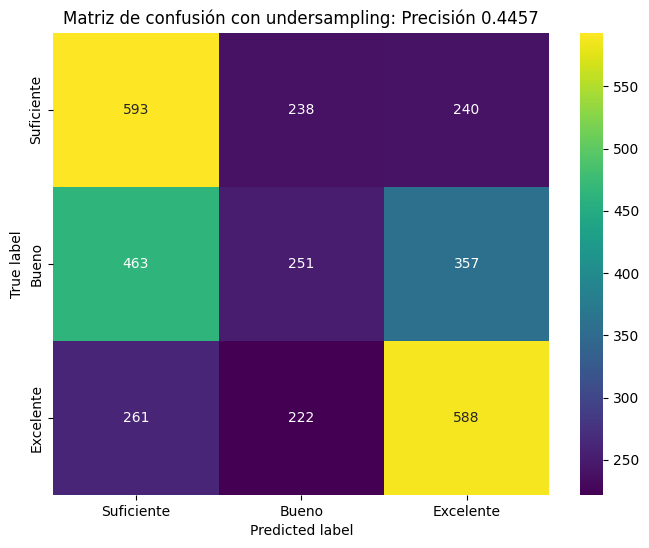

In [36]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar la base de datos
ruta_csv = 'BaseGeneral.csv'
df = pd.read_csv(ruta_csv)

# Reconstruir las variables afectadas con mayor precisión
df['terbien'] = df['r9'].apply(lambda x: 0 if str(x) == "1" else (1 if str(x) == "2" else None))
df['nuemp'] = pd.to_numeric(df['r18'], errors='coerce')
df['rangoingre'] = df['r26'].apply(lambda x: 0 if str(x) == "1" else
                                            1 if str(x) == "2" else
                                            2 if str(x) == "3" else
                                            3 if str(x) == "4" else
                                            4 if str(x) == "5" else
                                            5 if str(x) in ["6", "7", "8"] else None)
df['horstrab'] = pd.to_numeric(df['r24'], errors='coerce')
df['ranhortra'] = df['horstrab'].apply(lambda x: 0 if 1 <= x <= 7 else
                                                 1 if 8 <= x <= 14 else
                                                 2 if 15 <= x <= 21 else
                                                 3 if 22 <= x <= 28 else
                                                 4 if 29 <= x <= 35 else
                                                 5 if 36 <= x <= 42 else
                                                 6 if 43 <= x <= 49 else
                                                 7 if 50 <= x <= 57 else
                                                 8 if 58 <= x <= 98 else None)

# Variables del Logit
df['promfin'] = df['r11'].apply(lambda x: 0 if str(x) == "S" else (1 if str(x) == "B" else (2 if str(x) == "E" else None)))
df['sex'] = df['r3'].apply(lambda x: 0 if str(x) == "F" else (1 if str(x) == "M" else None))
df['estadocivil'] = df['r5'].apply(lambda x: 0 if str(x) == "1" else (1 if str(x) in ["2", "6"] else None))
df['seguirestud'] = df['r14'].apply(lambda x: 0 if str(x) == "2" else (1 if str(x) == "1" else None))
df['trabyest'] = df['r16'].apply(lambda x: 0 if str(x) == "2" else (1 if str(x) == "1" else None))
df['carrerax2'] = df['r34'].apply(lambda x: 0 if str(x) == "2" else (1 if str(x) == "1" else None))
df['conax2'] = df['r32'].apply(lambda x: 0 if str(x) == "2" else (1 if str(x) == "1" else None))
df['escopadre'] = df['r36'].apply(lambda x: 0 if str(x) == "1" else
                                             1 if str(x) == "2" else
                                             2 if str(x) in ["3", "4"] else
                                             3 if str(x) in ["5", "6"] else
                                             4 if str(x) in ["7", "8", "9"] else None)
df['edad'] = df['r4'].apply(lambda x: 0 if 16 <= x <= 18 else
                                     1 if 19 <= x <= 22 else
                                     2 if 23 <= x <= 34 else None)

# Asegurarse de que todas las variables categóricas estén en el formato adecuado
df['terbien'] = df['terbien'].astype('category')
df['rangoingre'] = df['rangoingre'].astype('category')
df['ranhortra'] = df['ranhortra'].astype('category')
df['promfin'] = df['promfin'].astype('category')
df['sex'] = df['sex'].astype('category')
df['estadocivil'] = df['estadocivil'].astype('category')
df['seguirestud'] = df['seguirestud'].astype('category')
df['trabyest'] = df['trabyest'].astype('category')
df['carrerax2'] = df['carrerax2'].astype('category')
df['conax2'] = df['conax2'].astype('category')
df['escopadre'] = df['escopadre'].astype('category')
df['edad'] = df['edad'].astype('category')

# Eliminar valores NaN restantes
df = df.dropna()

# Definir variables independientes y dependiente
X = df[['sex', 'estadocivil', 'seguirestud', 'trabyest', 'carrerax2', 'conax2', 'edad', 'escopadre']]
y = df['promfin'].cat.codes  # Convertir la variable de respuesta en numérico

# Submuestreo aleatorio
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Ajustar el modelo logit ordinal
model = OrderedModel(y_resampled, X_resampled, distr='logit')
result = model.fit(method='bfgs', maxiter=2000)

# Mostrar los resultados del modelo
print(result.summary())

# Calcular los Odds Ratios
odds_ratios = np.exp(result.params)

# Mostrar los Odds Ratios
print("\nOdds Ratios de los Coeficientes:\n")
print(odds_ratios)

# Predicciones y evaluación del modelo
pred_probs = result.predict(X_resampled)
y_pred = np.argmax(pred_probs.values, axis=1)

precision = accuracy_score(y_resampled, y_pred)
print(f"\nPrecisión del modelo con undersampling: {precision:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_resampled, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=['Suficiente', 'Bueno', 'Excelente'], yticklabels=['Suficiente', 'Bueno', 'Excelente'])
plt.title(f'Matriz de confusión con undersampling: Precisión {precision:.4f}')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


"Mejora" en el sentido de que ya hace predicciones distintas a 1. Aunque el accuracy general es bajo. 